Part 3 concerns non symmetric distributions, such as chi-squared distributed errors. They are of interest because they are non-symmetric and positive.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewnorm.html

https://en.wikipedia.org/wiki/Skew_normal_distribution

Also, the previous functions are refactored. A more general function is used here.

In [303]:
import numpy as np
import matplotlib.pyplot as plt

In [304]:
iterations = 10000
n = 30
secret_beta = 2

It is good to refactor everything into functions! Avoid repeated code!

In [305]:
var_u_list = [0, 1.5, 2, 2.5,3.0,4.5,6.0,8.0,10.0]
var_eps_list = [1.5, 2, 2.5]

def experiment(distribution_label, gen_err_u, gen_err_eps):
    print(f"{distribution_label} distributed epsilon")
    
    beta_dict = {}
    sigma_dict = {}

    for var_u in var_u_list:
        for var_eps in var_eps_list:
            bias_beta = np.array([])
            sqerr_beta = np.array([])
            bias_beta_adj = np.array([])
            sqerr_beta_adj = np.array([])

            bias_sigma = np.array([])
            bias_sigma_adj = np.array([])

            for _ in range(iterations):
                x = np.linspace(-20,20,n)
                if var_u > 0:
                    x_obs = x + gen_err_u(var_u, n)
                else:
                    x_obs = x
                y = x*secret_beta + gen_err_x(var_eps, n)

                beta_est = np.cov(x_obs, y)[0][1]/np.var(x_obs, ddof=1)
                beta_est_adj = np.cov(x_obs, y)[0][1]/np.var(x_obs, ddof=1) * np.var(x_obs, ddof=1)/(np.var(x_obs, ddof=1) - var_u)

                sigma_est = np.sum((y - beta_est * x_obs) ** 2) / (n-1)
                sigma_est_adj = np.sum((y - beta_est_adj * x_obs) ** 2) / (n-1)

                bias_beta = np.append(bias_beta, (beta_est-secret_beta))
                sqerr_beta = np.append(sqerr_beta, (beta_est-secret_beta)**2)
                bias_beta_adj = np.append(bias_beta_adj, (beta_est_adj-secret_beta))
                sqerr_beta_adj = np.append(sqerr_beta_adj, (beta_est_adj-secret_beta)**2)

                bias_sigma = np.append(bias_sigma, sigma_est-var_eps)
                bias_sigma_adj = np.append(bias_sigma_adj, sigma_est_adj-var_eps)

            print("var_u=%.2f, var_eps=%.2f:  Unadjusted: Bias = %f, MSE = %f; Sigma bias = %f"%(var_u, var_eps, bias_beta.mean(), sqerr_beta.mean(), bias_sigma.mean()))

            print("var_u=%.2f, var_eps=%.2f:  Adjusted:   Bias = %f, MSE = %f; Sigma bias = %f"%(var_u, var_eps, bias_beta_adj.mean(), sqerr_beta_adj.mean(), bias_sigma_adj.mean()))
        
            beta_dict[(var_u, var_eps)] = {}
            beta_dict[(var_u, var_eps)]['bias_ols'] = bias_beta.mean()
            beta_dict[(var_u, var_eps)]['sqerr_ols'] = sqerr_beta.mean()
            beta_dict[(var_u, var_eps)]['bias_ols_corr'] = bias_beta_adj.mean()
            beta_dict[(var_u, var_eps)]['sqerr_ols_corr'] = sqerr_beta_adj.mean()
            
            sigma_dict[(var_u, var_eps)] = {}
            sigma_dict[(var_u, var_eps)]['bias_ols'] = bias_sigma.mean()
            sigma_dict[(var_u, var_eps)]['bias_ols_corr'] = bias_sigma_adj.mean()
        
    return beta_dict, sigma_dict

In [338]:
def show_plot(title, dicts, x_label, key1, key2, y_min, y_max):
    import matplotlib.pyplot as plt
    fig, axs = plt.subplots(len(var_u_list), len(var_eps_list), figsize=(15,30))

    for i in range(len(var_u_list)):
        for j in range(len(var_eps_list)):
            labels = x_label
            vals1 = [ d[(var_u_list[i], var_eps_list[j])][key1] for d in dicts]
            vals2 = [ d[(var_u_list[i], var_eps_list[j])][key2] for d in dicts]
            
            x = np.arange(len(labels))  # the label locations
            width = 0.35  # the width of the bars
            
            axs[i,j].set_title(title + ': $\\sigma^2_u=%.2f$, $\\sigma^2_\\epsilon=%.2f$'%(var_u_list[i], var_eps_list[j]))
            axs[i,j].bar(x - width/2, vals1, width, label="OLS")
            axs[i,j].bar(x + width/2, vals2, width, label="MME")
            axs[i,j].set_xticks(x)
            axs[i,j].set_xticklabels(labels)
            axs[i,j].legend()
            
            # axs[i,j].bar(x_label,vals,color=['tab:blue', 'tab:orange', 'tab:green'][:len(dicts)])
            axs[i][j].set_ylim(y_min, y_max)
            
    plt.subplots_adjust(hspace=0.3)

    plt.show()

Perform experiments

In [307]:
def gen_err_x(var, n):
    return np.random.normal(scale=np.sqrt(var), size=n)

def gen_err_eps(var, n):
    return np.random.normal(scale=np.sqrt(var), size=n)

beta_dict_normal, sigma_dict_normal = experiment("Normal", gen_err_x, gen_err_eps)

Normal distributed epsilon
var_u=0.00, var_eps=1.50:  Unadjusted: Bias = -0.000011, MSE = 0.000345; Sigma bias = -0.001664
var_u=0.00, var_eps=1.50:  Adjusted:   Bias = -0.000011, MSE = 0.000345; Sigma bias = -0.001664
var_u=0.00, var_eps=2.00:  Unadjusted: Bias = -0.000013, MSE = 0.000467; Sigma bias = -0.003030
var_u=0.00, var_eps=2.00:  Adjusted:   Bias = -0.000013, MSE = 0.000467; Sigma bias = -0.003030
var_u=0.00, var_eps=2.50:  Unadjusted: Bias = -0.000248, MSE = 0.000588; Sigma bias = -0.007364
var_u=0.00, var_eps=2.50:  Adjusted:   Bias = -0.000248, MSE = 0.000588; Sigma bias = -0.007364
var_u=1.50, var_eps=1.50:  Unadjusted: Bias = -0.018213, MSE = 0.002064; Sigma bias = 5.950158
var_u=1.50, var_eps=1.50:  Adjusted:   Bias = 0.002000, MSE = 0.001829; Sigma bias = 6.015070
var_u=1.50, var_eps=2.00:  Unadjusted: Bias = -0.018359, MSE = 0.002119; Sigma bias = 5.914404
var_u=1.50, var_eps=2.00:  Adjusted:   Bias = 0.001850, MSE = 0.001878; Sigma bias = 5.979404
var_u=1.50, var_eps

In [308]:
def gen_err_x(var, n):
    return np.random.standard_t(df=2*var/(var-1), size=n) # var=df/(df-2)

def gen_err_eps(var, n):
    return np.random.standard_t(df=2*var/(var-1), size=n)

beta_dict_t, sigma_dict_t = experiment("Student-T", gen_err_x, gen_err_eps)

Student-T distributed epsilon
var_u=0.00, var_eps=1.50:  Unadjusted: Bias = -0.000151, MSE = 0.000351; Sigma bias = -0.010274
var_u=0.00, var_eps=1.50:  Adjusted:   Bias = -0.000151, MSE = 0.000351; Sigma bias = -0.010274
var_u=0.00, var_eps=2.00:  Unadjusted: Bias = -0.000022, MSE = 0.000471; Sigma bias = -0.007082
var_u=0.00, var_eps=2.00:  Adjusted:   Bias = -0.000022, MSE = 0.000471; Sigma bias = -0.007082
var_u=0.00, var_eps=2.50:  Unadjusted: Bias = -0.000067, MSE = 0.000564; Sigma bias = -0.033724
var_u=0.00, var_eps=2.50:  Adjusted:   Bias = -0.000067, MSE = 0.000564; Sigma bias = -0.033724
var_u=1.50, var_eps=1.50:  Unadjusted: Bias = -0.018755, MSE = 0.002079; Sigma bias = 5.972829
var_u=1.50, var_eps=1.50:  Adjusted:   Bias = 0.001441, MSE = 0.001821; Sigma bias = 6.037733
var_u=1.50, var_eps=2.00:  Unadjusted: Bias = -0.018534, MSE = 0.002194; Sigma bias = 5.966406
var_u=1.50, var_eps=2.00:  Adjusted:   Bias = 0.001674, MSE = 0.001948; Sigma bias = 6.031312
var_u=1.50, var_

In [309]:
def gen_err_x(var, n):
    return np.random.chisquare(df=var/2.0, size=n) - var/2.0# var=2*dof

def gen_err_eps(var, n):
    return np.random.chisquare(df=var/2.0, size=n) - var/2.0

beta_dict_chi, sigma_dict_chi = experiment("ChiSq", gen_err_x, gen_err_eps)

ChiSq distributed epsilon
var_u=0.00, var_eps=1.50:  Unadjusted: Bias = -0.000319, MSE = 0.000345; Sigma bias = -0.001391
var_u=0.00, var_eps=1.50:  Adjusted:   Bias = -0.000319, MSE = 0.000345; Sigma bias = -0.001391
var_u=0.00, var_eps=2.00:  Unadjusted: Bias = 0.000162, MSE = 0.000458; Sigma bias = -0.000551
var_u=0.00, var_eps=2.00:  Adjusted:   Bias = 0.000162, MSE = 0.000458; Sigma bias = -0.000551
var_u=0.00, var_eps=2.50:  Unadjusted: Bias = 0.000399, MSE = 0.000592; Sigma bias = 0.008786
var_u=0.00, var_eps=2.50:  Adjusted:   Bias = 0.000399, MSE = 0.000592; Sigma bias = 0.008786
var_u=1.50, var_eps=1.50:  Unadjusted: Bias = -0.019037, MSE = 0.002221; Sigma bias = 5.854786
var_u=1.50, var_eps=1.50:  Adjusted:   Bias = 0.001156, MSE = 0.001956; Sigma bias = 5.919475
var_u=1.50, var_eps=2.00:  Unadjusted: Bias = -0.018863, MSE = 0.002291; Sigma bias = 5.858518
var_u=1.50, var_eps=2.00:  Adjusted:   Bias = 0.001336, MSE = 0.002035; Sigma bias = 5.923248
var_u=1.50, var_eps=2.50: 

Plot the results for comparison

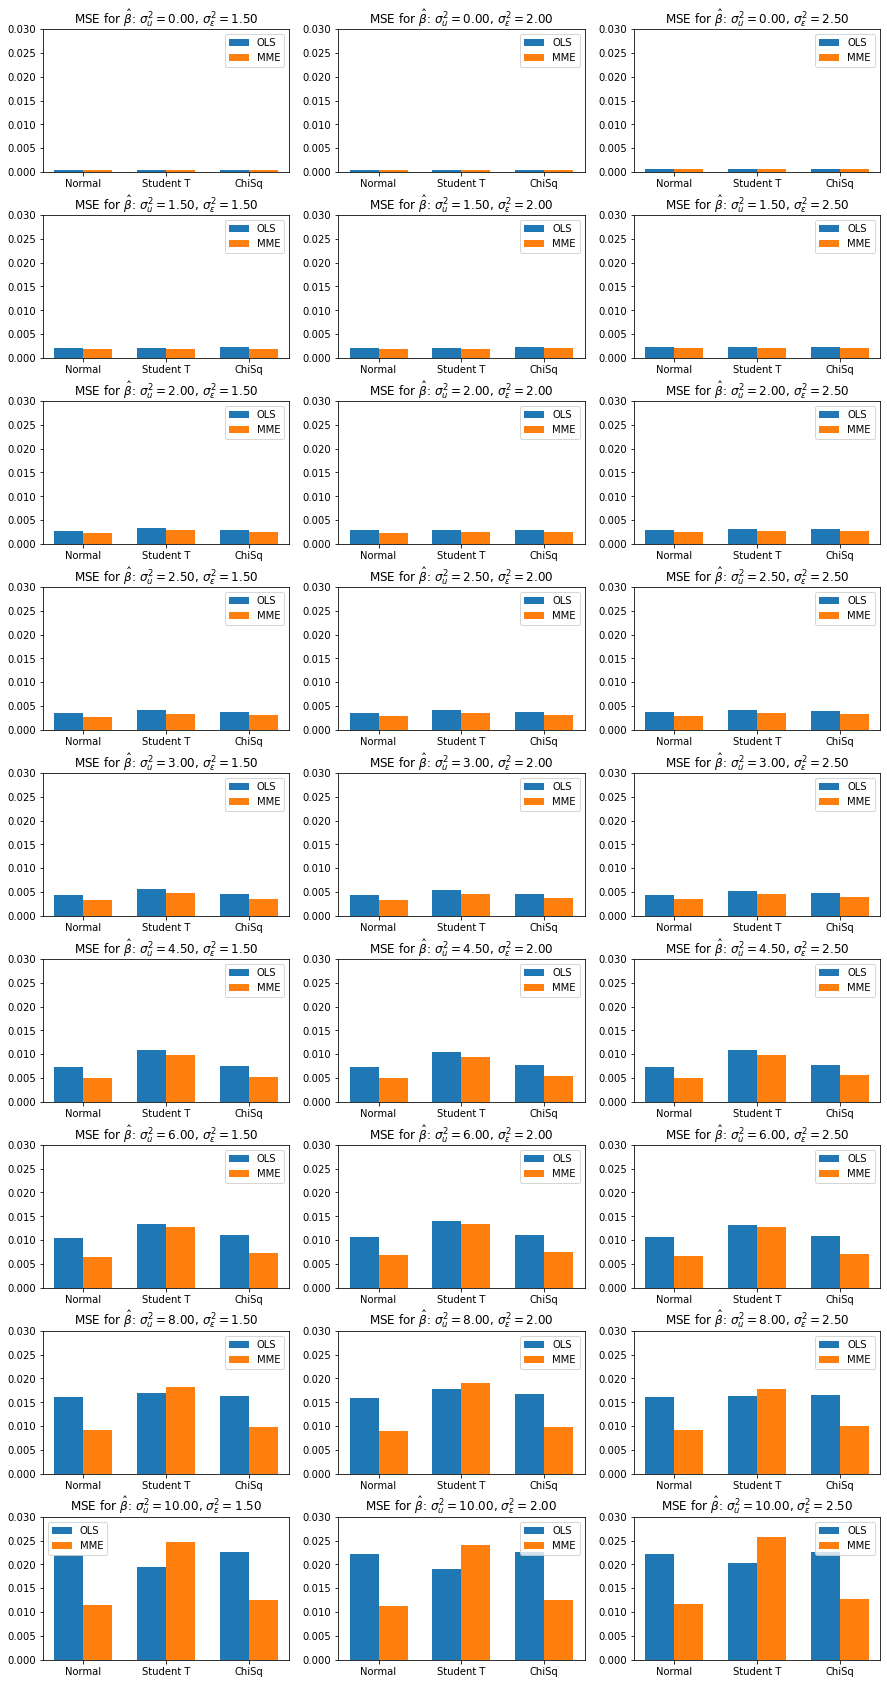

In [350]:
show_plot("MSE for $\\hat{\\beta}$", [beta_dict_normal, beta_dict_t, beta_dict_chi], ['Normal', 'Student T', 'ChiSq'], 'sqerr_ols', 'sqerr_ols_corr', 0, 0.03)

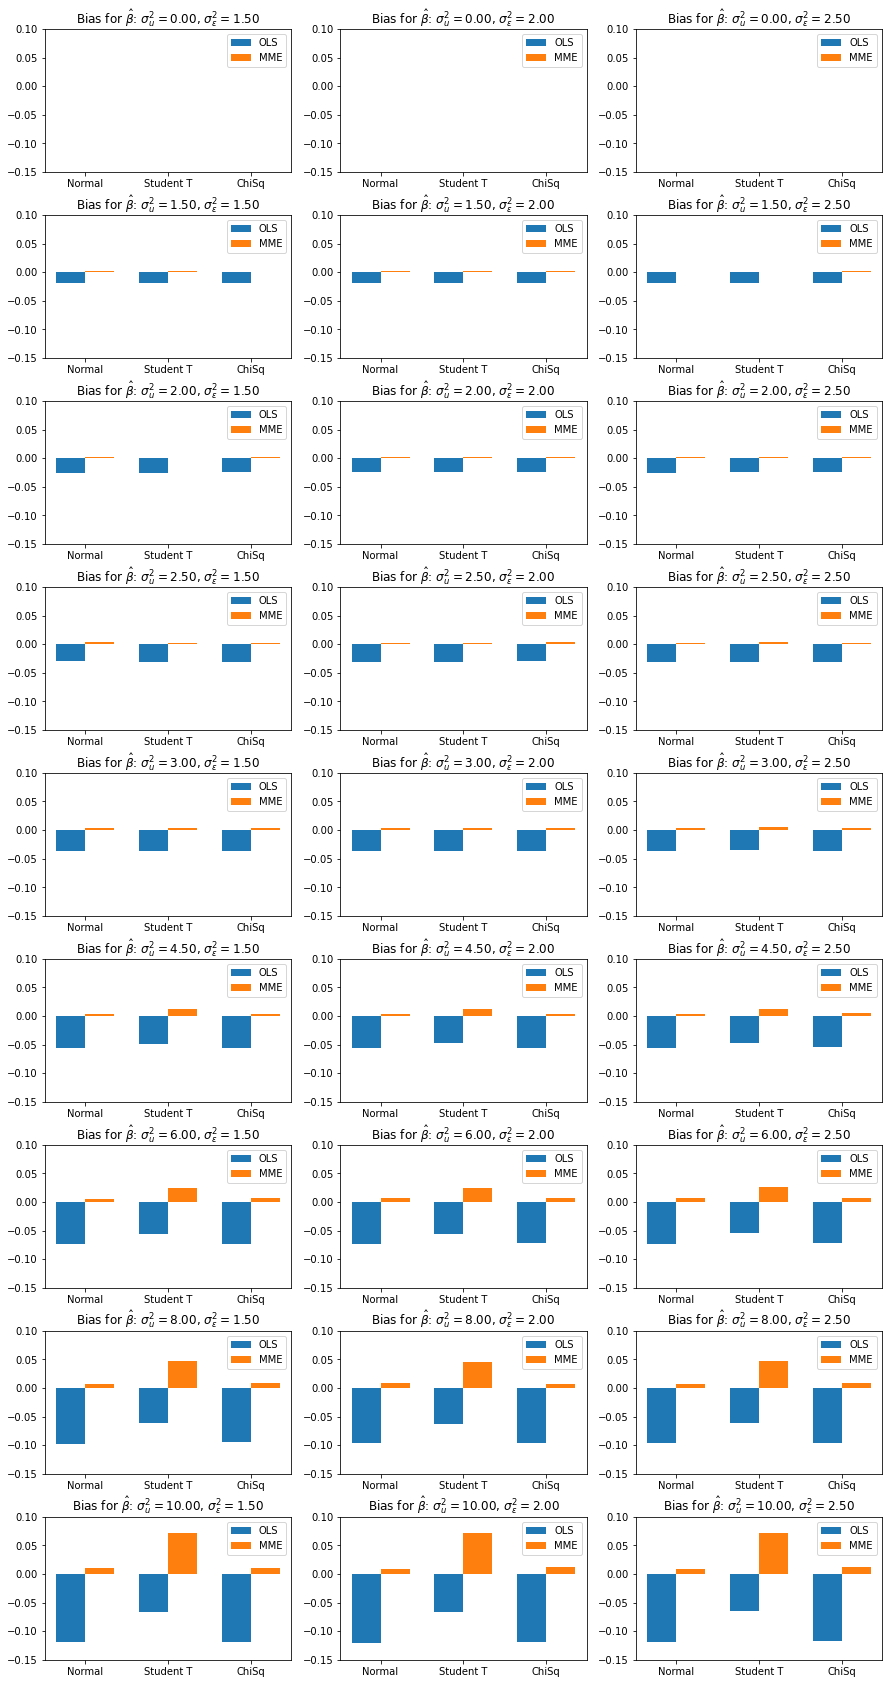

In [349]:
show_plot("Bias for $\\hat{\\beta}$", [beta_dict_normal, beta_dict_t, beta_dict_chi], ['Normal', 'Student T', 'ChiSq'], 'bias_ols', 'bias_ols_corr', -0.15, 0.1)

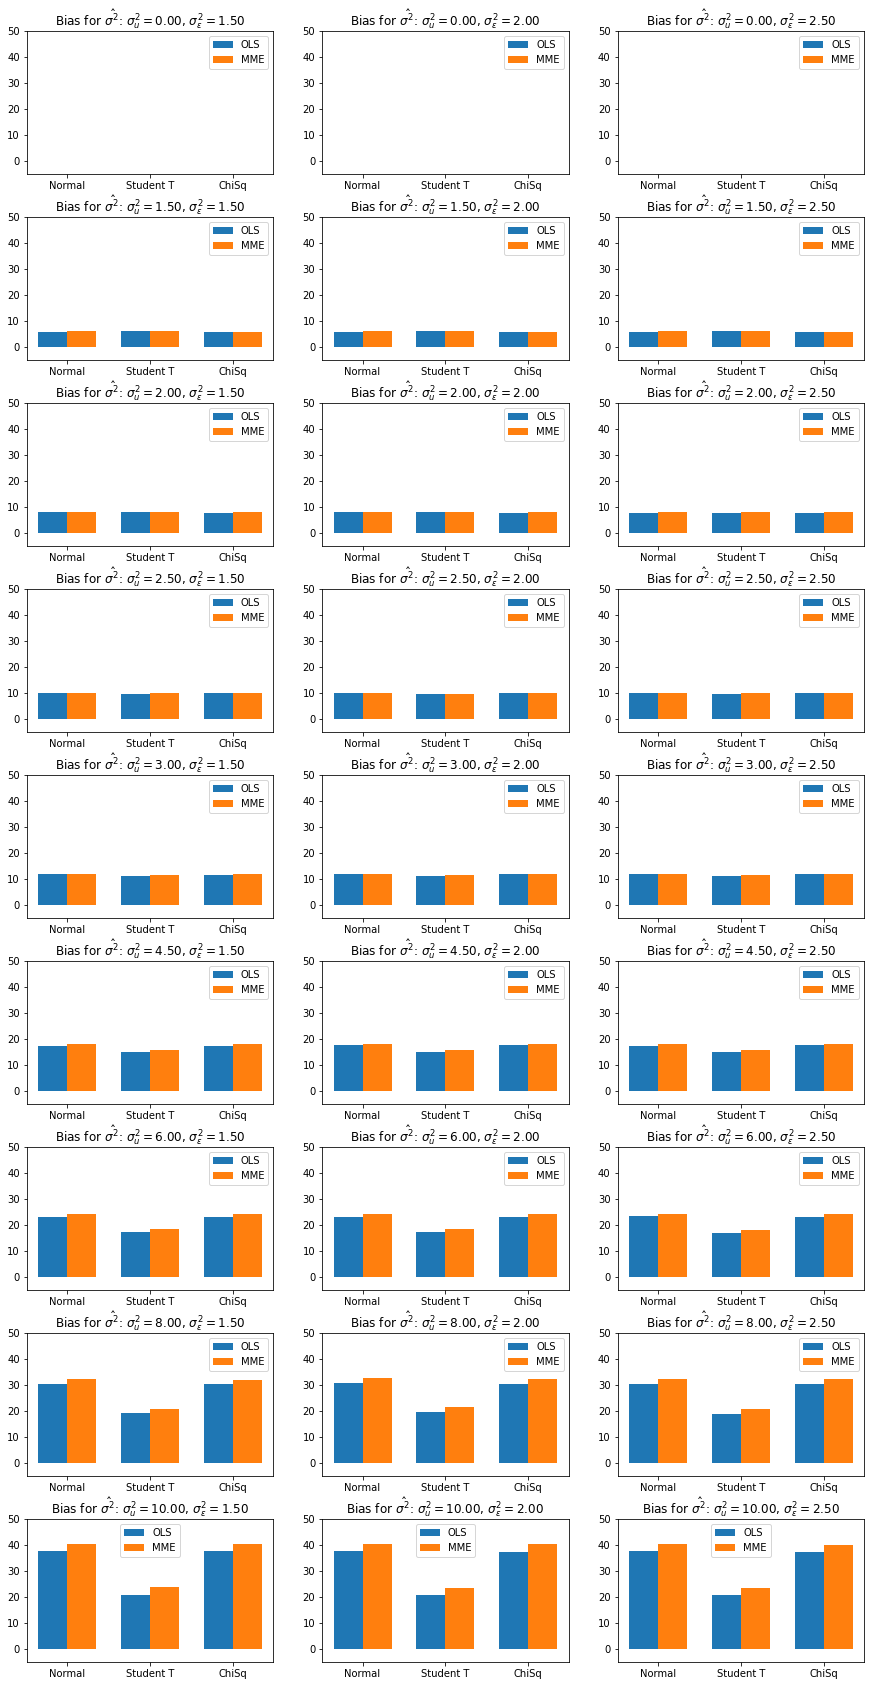

In [347]:
show_plot("Bias for $\\hat{\\sigma^2}$", [sigma_dict_normal, sigma_dict_t, sigma_dict_chi], ['Normal', 'Student T', 'ChiSq'], 'bias_ols', 'bias_ols_corr', -5, 50.0)

Special property of assuming normal errors: Maximum likelihood estimation is exactly the same as OLS